# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

First install the dep

In [ ]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

## Import libraries as necessary

Get libraries and dataset from our repository

In [25]:
!wget https://github.com/cartasuzuki/phynance/blob/master/datasets/nikkei_high_dividend_yield_50_prices.csv
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2019-01-16 06:04:44--  https://github.com/cartasuzuki/phynance/blob/master/datasets/nikkei_high_dividend_yield_50_prices.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘nikkei_high_dividend_yield_50_prices.csv.1’

nikkei_high_dividen     [    <=>             ]   1.14M  1.77MB/s    in 0.6s    

2019-01-16 06:04:46 (1.77 MB/s) - ‘nikkei_high_dividend_yield_50_prices.csv.1’ saved [1197389]

--2019-01-16 06:04:46--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.88.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.88.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3325 (3.2K) [text/plain]
Saving to: ‘nikkei_high_dividend

Import libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from PortfolioOptimizer import PortfolioOptimizer

In [15]:
stock_symbols = pd.read_csv('nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Method 1: use csv file

In [ ]:
stocks = pd.read_csv('nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

### Method 2: Get prices from alphadvantage

In [31]:
nikkei50CodeString = stock_symbols['Code'].values.astype(int)
nikkei50CodeString = nikkei50CodeString.astype(str)
string = '.TOK'
nikkei50CodeString = [x + string for x in nikkei50CodeString]

Then download prices (it can take a while)

In [ ]:
stocks = get_stock_prices(nikkei50CodeString)  

## Portfolio Optimization

In [28]:
weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0)

2768.TOK: 17.0%
4704.TOK: 7.000000000000001%
5002.TOK: 8.0%
8001.TOK: 11.0%
8035.TOK: 24.0%
8053.TOK: 7.000000000000001%
8058.TOK: 14.000000000000002%
8628.TOK: 5.0%
Sharpe: 0.44
Exp. Return: 11.26


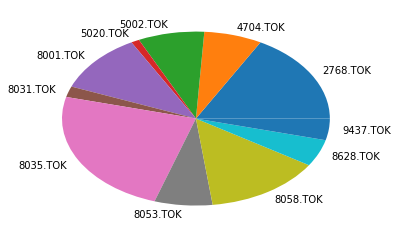

In [29]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)